<a href="https://colab.research.google.com/github/jcamachocasero/Data-Science/blob/master/00_Seaborn_in_a_nutshell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn in a Nutshell

In [54]:
import numpy as np
import seaborn  as sns
%matplotlib inline

## Data

In [55]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots

To visualize the distribution of a data set: 

*distplot, jointplot, pairplot, rugplot, kdeplot*

**> distplot**

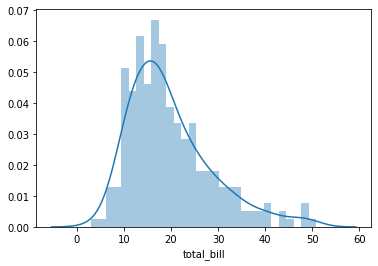

In [57]:
sns.distplot(tips['total_bill'],kde=True,bins=30)
#set kde=False to hide the courbe

**> jointplot**

match up two distplots for bivariate data. 
Options: 
“scatter”, “reg”, “resid”,“kde”, “hex”

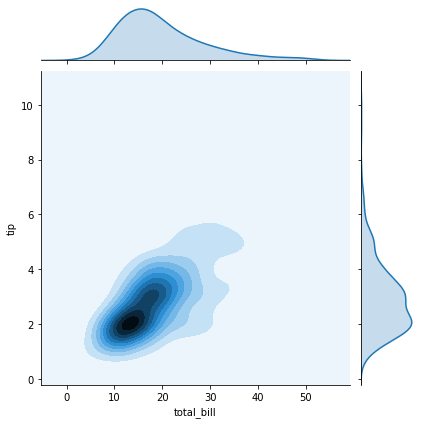

In [58]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

**> pairplot**

plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

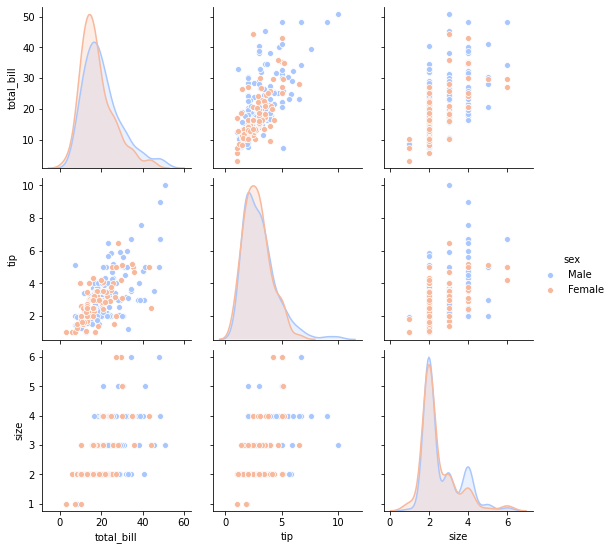

In [59]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

**> rugplot**

dash mark for every point on a univariate distribution. 

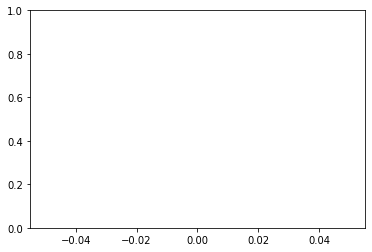

In [60]:
sns.rugplot(tips['total_bill'])

**> kdeplot**

kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

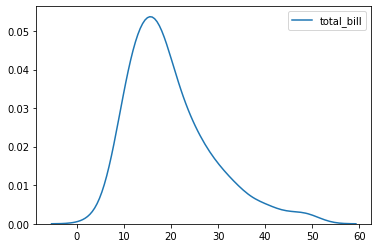

In [61]:
sns.kdeplot(tips['total_bill'])

## Categorical Data Plots

factorplot, boxplot, violinplot, stripplot, swarmplot, barplot, countplot

> **> barplot**

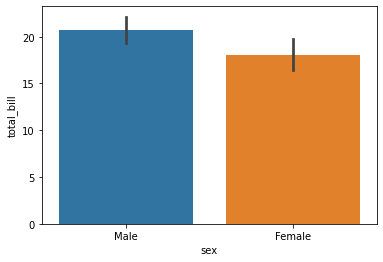

In [62]:
sns.barplot(x='sex',y='total_bill',data=tips)
# it is possible to change the estimator to what we desire (e.g. std dev)
# sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

**> countplot**

same as  boxplot but with an estimator calculated based on on the number of ocurrences

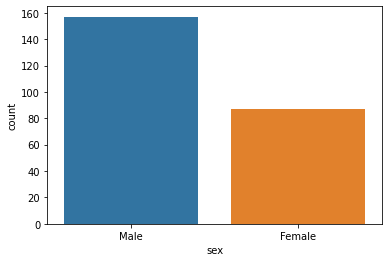

In [63]:
sns.countplot(x='sex', data=tips)

**> boxplot & violinplot**

Both are used to shown the distribution of categorical data.

***boxplot***: The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

***violinplot***: Similar representation but using the KDE  of the underlaying distribution



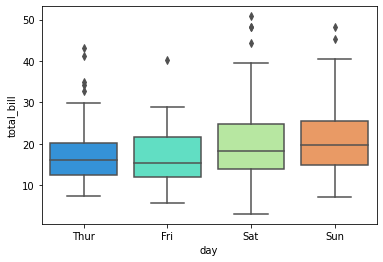

In [64]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

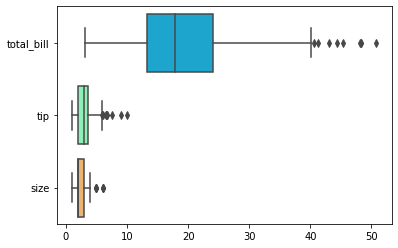

In [65]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

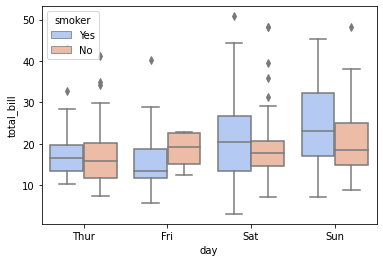

In [66]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

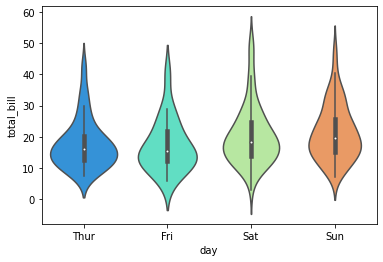

In [67]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

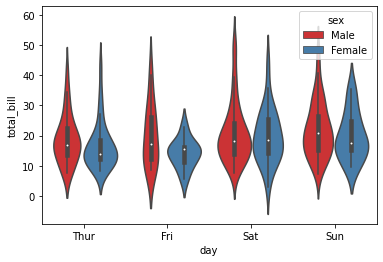

In [68]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

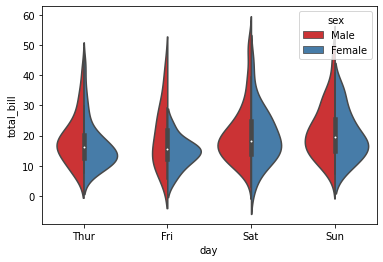

In [69]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

**> stripplot and swarmplot**

The **stripplot** will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The **swarmplot** is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

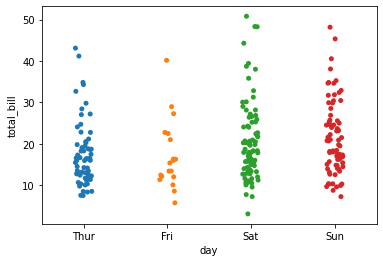

In [70]:
sns.stripplot(x='day', y='total_bill', data=tips)

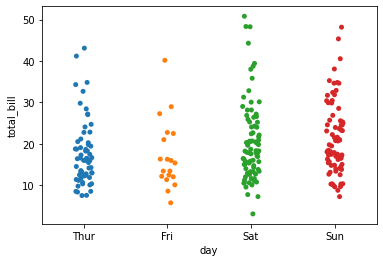

In [71]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

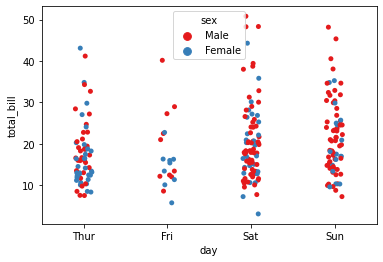

In [72]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

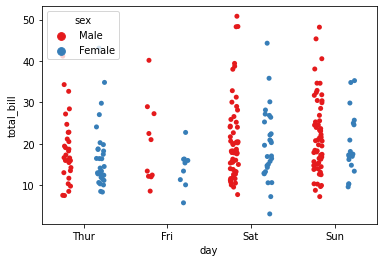

In [73]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True)

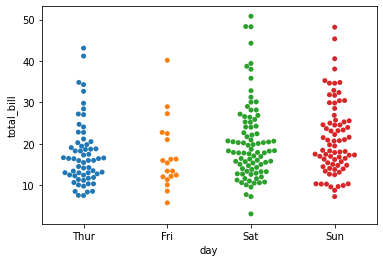

In [74]:
sns.swarmplot(x="day", y="total_bill", data=tips)

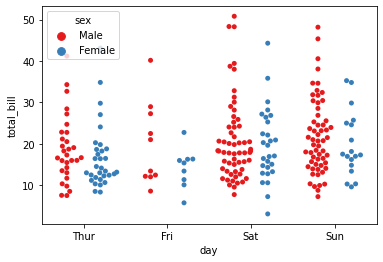

In [75]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

**Bonus: Combining Categorical Plots**

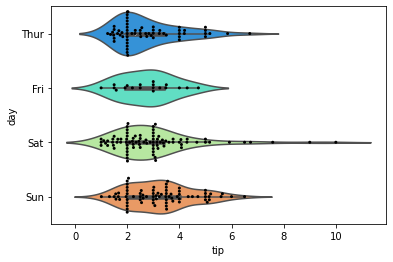

In [76]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y= "day", data=tips, color='black', size=3)

**Bonus: catplot (before named factorplot)**

The most general form of a categorical plot. It can take in a kind parameter to adjust the plot type. 

Categorical scatterplots:
+ stripplot() (with kind="strip"; the default)
+ swarmplot() (with kind="swarm")

Categorical distribution plots:
+ boxplot() (with kind="box")
+ violinplot() (with kind="violin")
+ boxenplot() (with kind="boxen")

Categorical estimate plots:
+ pointplot() (with kind="point")
+ barplot() (with kind="bar")
+ countplot() (with kind="count")

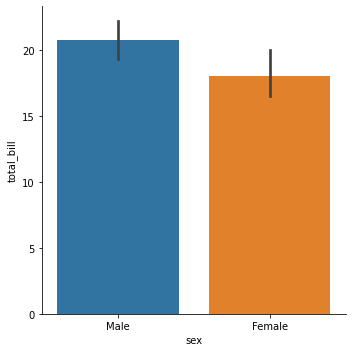

In [77]:
sns.catplot(x="sex", y="total_bill", data=tips, kind='bar')

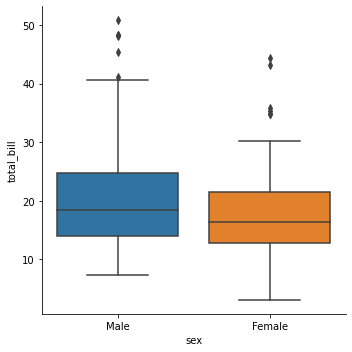

In [78]:
sns.catplot(x="sex", y="total_bill", data=tips, kind='box')

## Matrix Plots

**Reminder of input data**

In [79]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

/!\ Data should already be in a matrix form. 

There are two ways to build the matrix: correlation and pivoting.

Correlation method : {'pearson', 'kendall', 'spearman'}

In [81]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


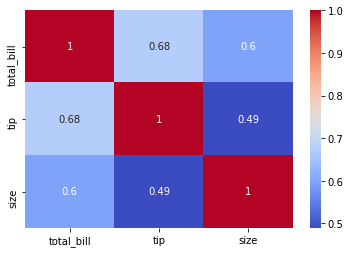

In [82]:
sns.heatmap(tc, cmap='coolwarm', annot=True)

In [83]:
pvflights = flights.pivot_table(values='passengers', index = 'month', columns='year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


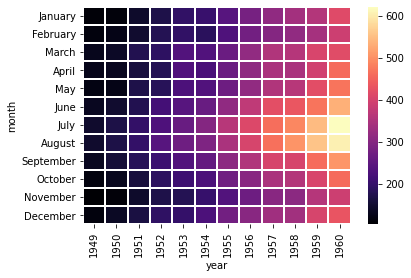

In [84]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)

## Clustermap

A clustered version of the heatmap

Sometimes it is convenient to normalize the data for a better representation.

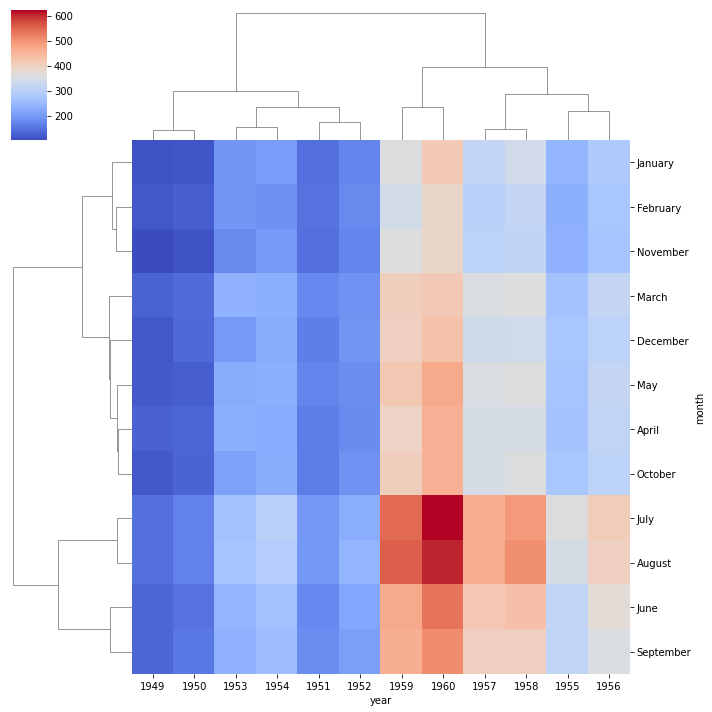

In [85]:
sns.clustermap(pvflights, cmap='coolwarm')

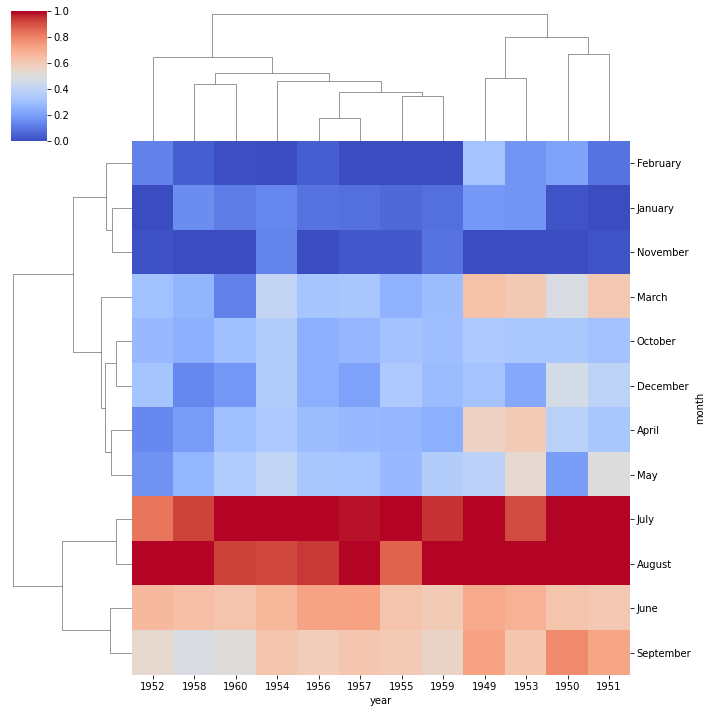

In [86]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)